1. Carga los datos de los tres archivos unidos en un DataFrame, y prepáralos
considerando las siguientes etapas:
a. asigna a la variable objetivo num un cero cuando su valor es cero, y un 1 en
otro caso. Muestra la cantidad de valores ausente por atributo. Procésalos
considerando los siguientes criterios:
i. si el atributo presenta un porcentaje de valores ausentes mayor a 25%,
entonces descartamos ese atributo.
ii. para los atributos con valores ausentes menores al 25% se deben
rellenar con el valor promedio del atributo de acuerdo a la clase, es
decir, los valores ausentes para los cuales num=0 se deben rellenar
con el promedio de los valores presentes para los cuales num=0.
iii. Para las variables categóricas, los valores a asignar (promedio) deben
ser aproximados al valor entero más cercano.
b. Construye variables dummies para las variables discretas con tres o más
categorías.
c. Realiza un análisis descriptivo por variable visualizando histogramas y
gráficos de barra según corresponda. Construye una matriz de correlaciones
con un heatmap, para las variables continuas. Plantea tus observaciones y
conclusiones


     0    1    2      3      4    5    6      7    8    9    10   11   12  13
0  63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   0
1  67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   2
2  67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   1
3  37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   0
4  41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   0
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')
Valores ausentes después de la limpieza:
0       0
1       0
2       0
3       3
4      23
5      83
6       2
7       2
8       2
9       6
10    207
11    413
12    320
13      0
dtype: int64
Valores ausentes por atributo:
0       0
1       0
2       0
3       6
4      46
5     166
6       4
7       4
8       4
9      12
10    414
11    826
12    640
13      0
dtype: int64

Valores ausentes después del procesamiento:
0     0
1     0
2     0
3     0
4     0


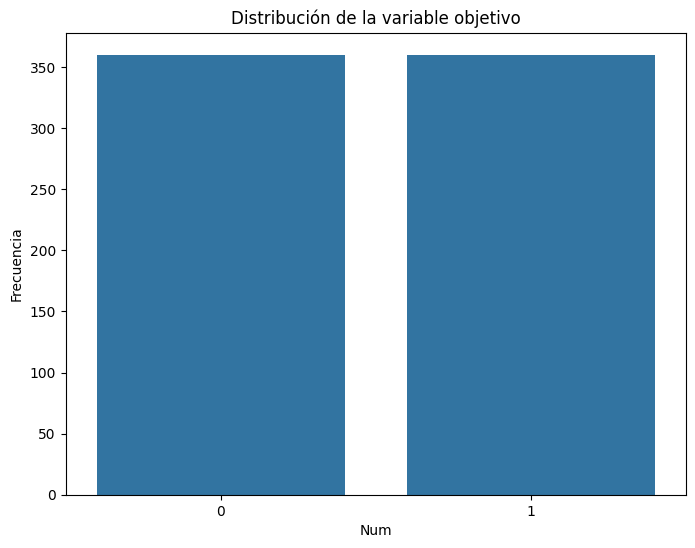

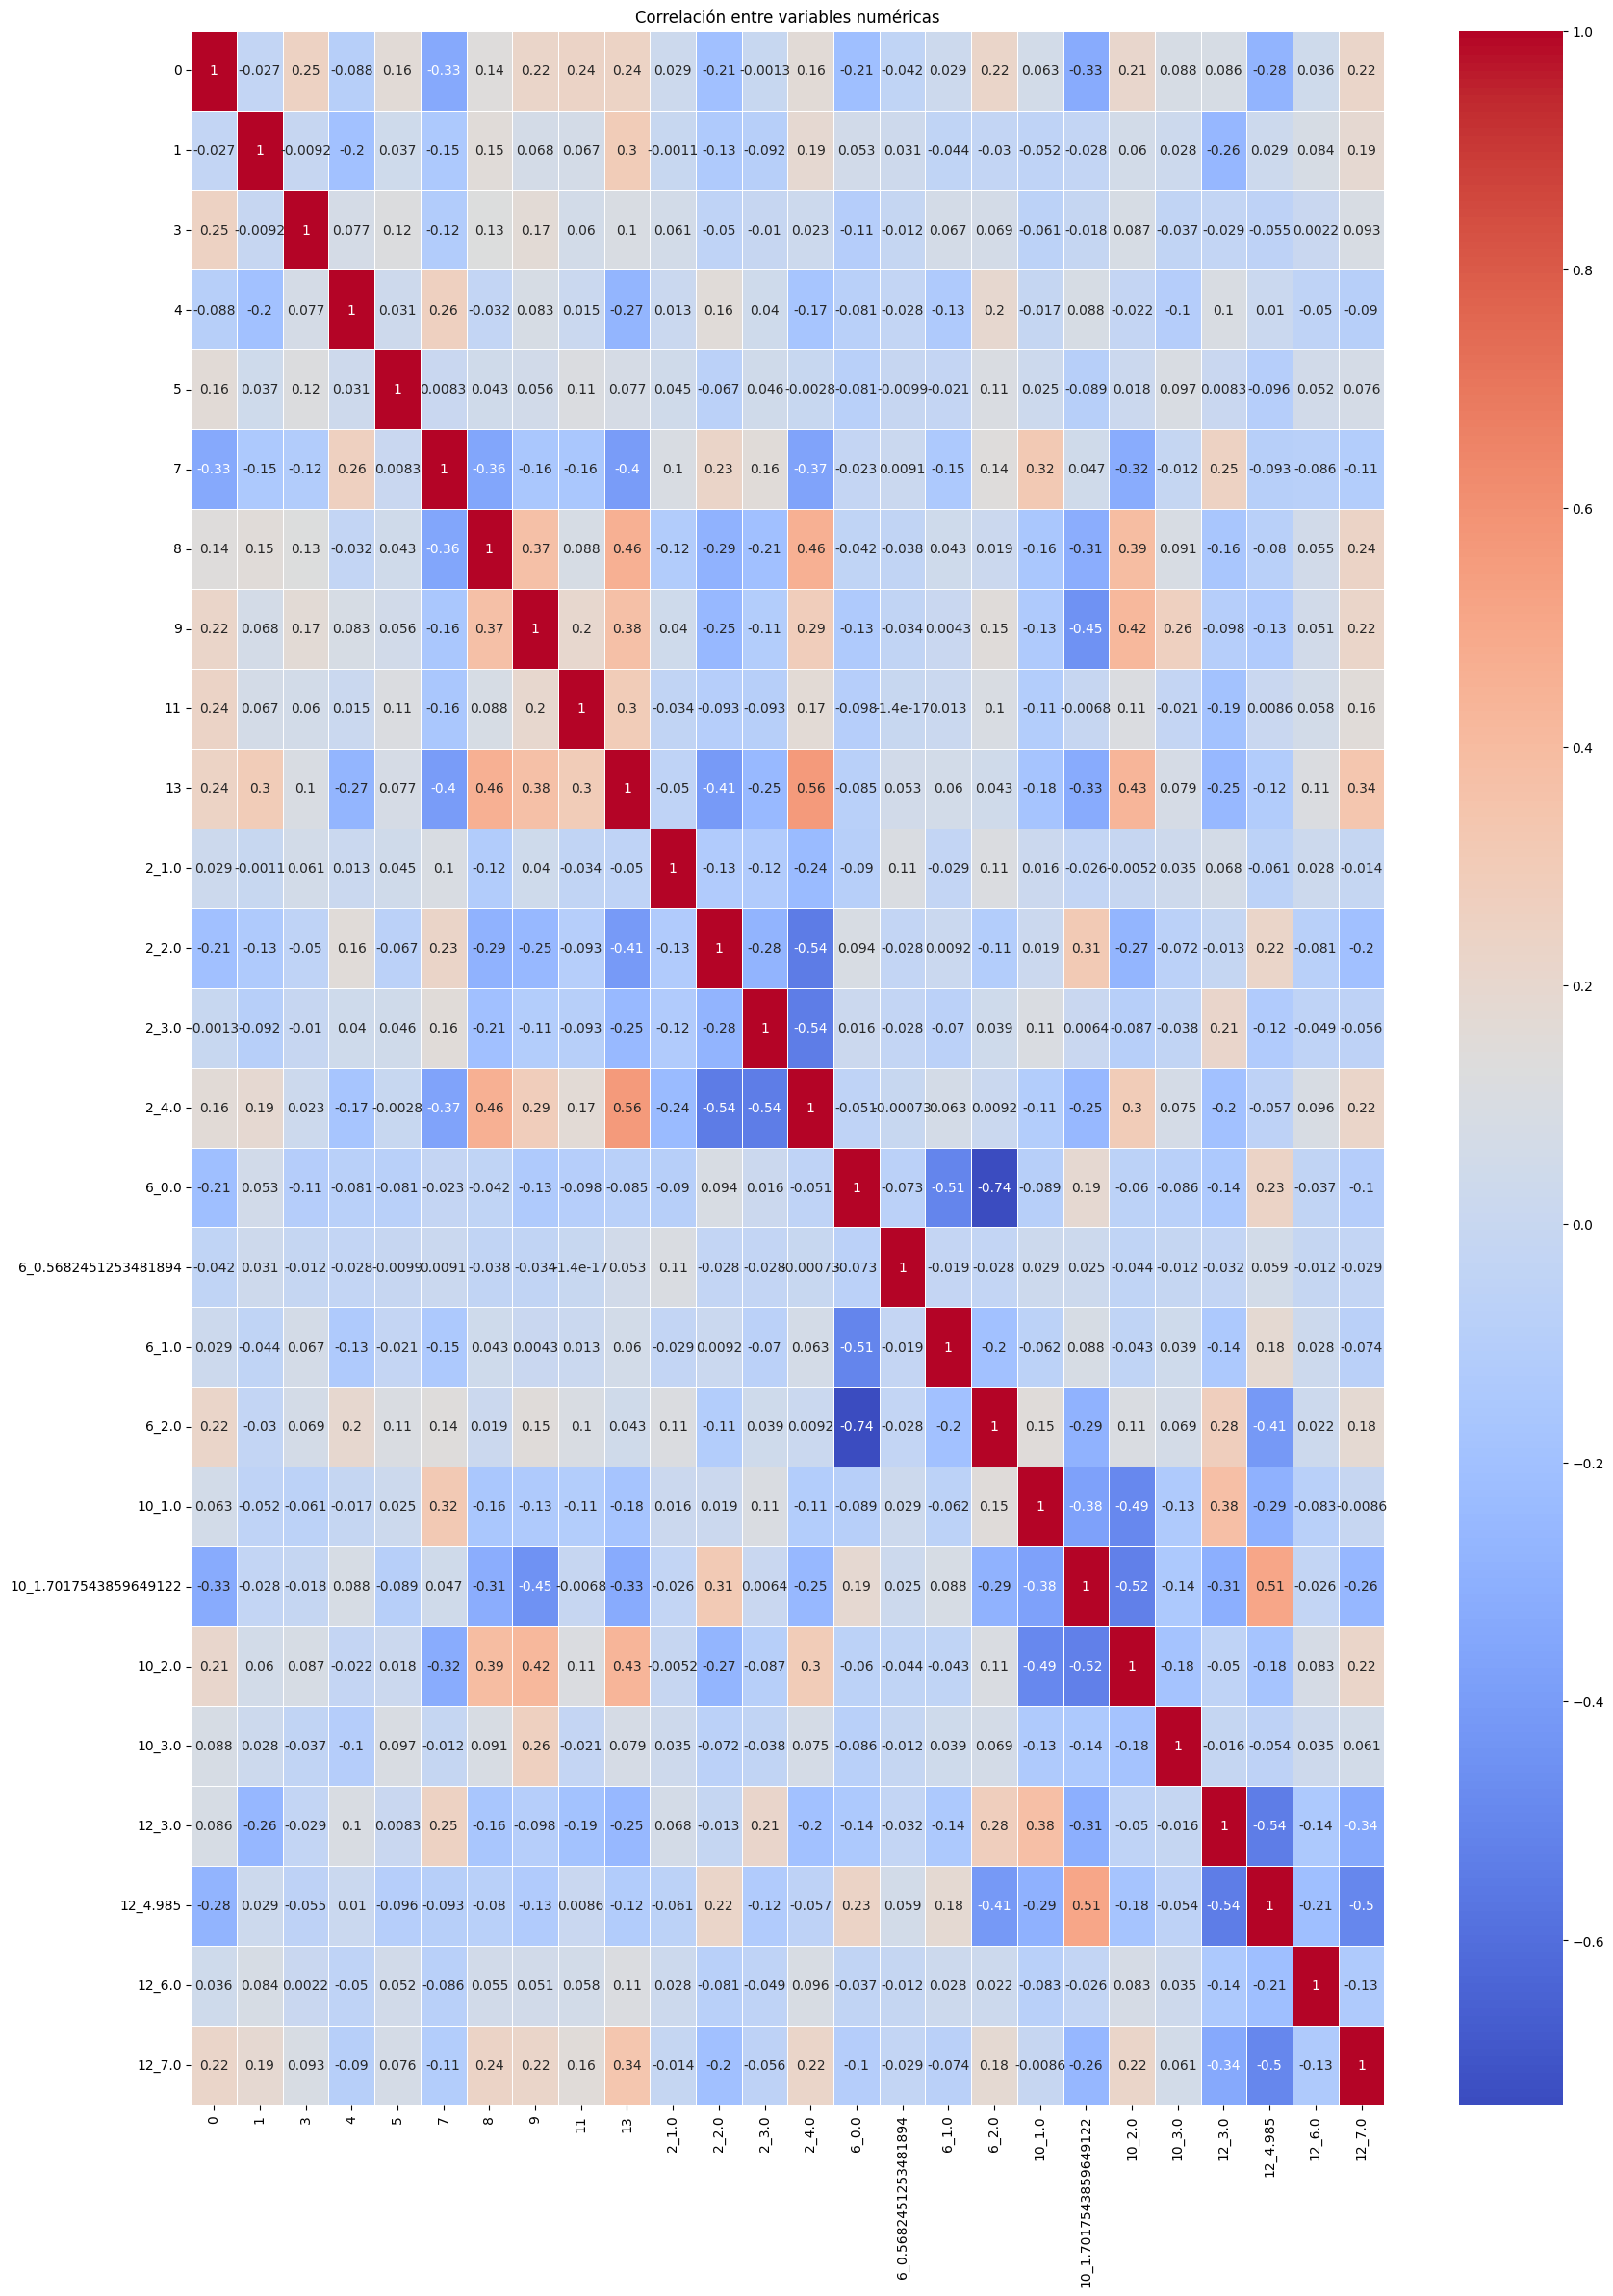

Estadísticas de las variables numéricas:
                0           1           3           4           5           7   
count  720.000000  720.000000  720.000000  720.000000  720.000000  720.000000  \
mean    51.888889    0.738889  131.804742  204.774749    0.109890  140.565460   
std      9.193720    0.439546   18.490635  107.513156    0.294379   25.611477   
min     28.000000    0.000000   80.000000    0.000000    0.000000   60.000000   
25%     45.000000    0.000000  120.000000  184.000000    0.000000  122.000000   
50%     53.000000    1.000000  130.000000  225.000000    0.000000  142.000000   
75%     58.000000    1.000000  140.000000  269.000000    0.000000  160.000000   
max     77.000000    1.000000  200.000000  603.000000    1.000000  202.000000   

                8           9          11          13  
count  720.000000  720.000000  720.000000  720.000000  
mean     0.337047    0.789636    0.680782    0.500000  
std      0.472372    1.062500    0.611340    0.500348  
min  

'Para la variable 9, la media es aproximadamente 0.79 y la desviación estándar es relativamente alta (aproximadamente 1.06), lo que sugiere cierta variabilidad en los datos.\nLa variable 13 parece ser una variable objetivo binaria, ya que tiene una media de aproximadamente 0.5, lo que sugiere que hay una proporción igual de unos y ceros.\nPara la variable 0, la edad promedio es de aproximadamente 51.89 años, con un mínimo de 28 años y un máximo de 77 años.\nPara la variable 3, la presión arterial promedio (en mmHg) es de aproximadamente 131.80, con una desviación estándar de aproximadamente 18.49.'

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report

#FernandoSanchez Cargar datos
data_cleveland = pd.read_csv("processed.cleveland.data", header=None)
data_hungarian = pd.read_csv("processed.hungarian.data", header=None)
data_switzerland = pd.read_csv("processed.switzerland.data", header=None)

#FernandoSanchez Concatenar datos
data = pd.concat([data_cleveland, data_hungarian, data_switzerland], ignore_index=True)
print(data.head())
print(data.columns)
#FernandoSanchez Asignar a la variable objetivo num un cero cuando su valor es cero, y un 1 en otro caso
data[13] = np.where(data[13] > 0, 1, 0)
#FernandoSanchez Reemplazar '?' con NaN y convertir a tipo numérico para las columnas específicas
columns_to_clean = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

for column in columns_to_clean:
    data[column] = pd.to_numeric(data[column], errors='coerce')

#FernandoSanchez Verficicar si hay valores NaN después de la limpieza
missing_values_after_cleaning = data.isnull().sum()
print("Valores ausentes después de la limpieza:")
print(missing_values_after_cleaning)
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns
    #FernandoSanchez Mostrar los valores únicos en estas columnas
for column in non_numeric_columns:
     print(f"Valores únicos en la columna {column}: {data[column].unique()}")

#FernandoSanchez Manejo de valores ausentes
def preprocess_data(df):
    #FernandoSanchez Mostrar cantidad de valores ausentes por atributo
    print("Valores ausentes por atributo:")
    print(df.isna().sum() + df.isnull().sum())

    #FernandoSanchez Descartar atributos con más del 25% de valores ausentes
    threshold = len(df) * 0.25
    df.dropna(thresh=threshold, axis=1, inplace=True)

    #FernandoSanchez Identificar atributos numéricos y categóricos
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = df.select_dtypes(include=['object']).columns

    #FernandoSanchez Rellenar valores ausentes para atributos numéricos
    for feature in numerical_features:
        #FernandoSanchez Convertir los valores a números
        df[feature] = pd.to_numeric(df[feature], errors='coerce')

        #FernandoSanchez Rellenar NaN con un valor específico (por ejemplo, la media de la columna)
        df[feature].fillna(df[feature].mean(), inplace=True)

    #FernandoSanchez Rellenar valores ausentes para atributos categóricos
    for feature in categorical_features:
        #FernandoSanchez Rellenar NaN con un valor específico (por ejemplo, la moda de la columna)
        df[feature].fillna(df[feature].mode()[0], inplace=True)
        
    print("\nValores ausentes después del procesamiento:")
    print(df.isna().sum() + df.isnull().sum())

    return df

#FernandoSanchez Aplicar preprocesamiento de datos
data = preprocess_data(data)

#FernandoSanchez Construir variables dummies para las variables discretas con tres o más categorías
data = pd.get_dummies(data, columns=[2, 6, 10, 12])


#FernandoSanchez Visualización de distribución de la variable objetivo
plt.figure(figsize=(8, 6))
sns.countplot(x=data[13])
plt.title("Distribución de la variable objetivo")
plt.xlabel("Num")
plt.ylabel("Frecuencia")
plt.show()

#FernandoSanchez Visualización de correlación entre variables numéricas
plt.figure(figsize=(20, 28))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlación entre variables numéricas")
plt.show()


#FernandoSanchez Estadísticas adicionales
print("Estadísticas de las variables numéricas:")
print(data.describe())

print("\nFrecuencia de valores en variables categóricas:")
for col in data.select_dtypes(include=['object']).columns:
    print(data[col].value_counts())

print("\nFrecuencia de valores en variables dummy:")
for col in data.select_dtypes(include=['bool']).columns:
    print(data[col].value_counts())


"""Para la variable 9, la media es aproximadamente 0.79 y la desviación estándar es relativamente alta (aproximadamente 1.06), lo que sugiere cierta variabilidad en los datos.
La variable 13 parece ser una variable objetivo binaria, ya que tiene una media de aproximadamente 0.5, lo que sugiere que hay una proporción igual de unos y ceros.
Para la variable 0, la edad promedio es de aproximadamente 51.89 años, con un mínimo de 28 años y un máximo de 77 años.
Para la variable 3, la presión arterial promedio (en mmHg) es de aproximadamente 131.80, con una desviación estándar de aproximadamente 18.49."""

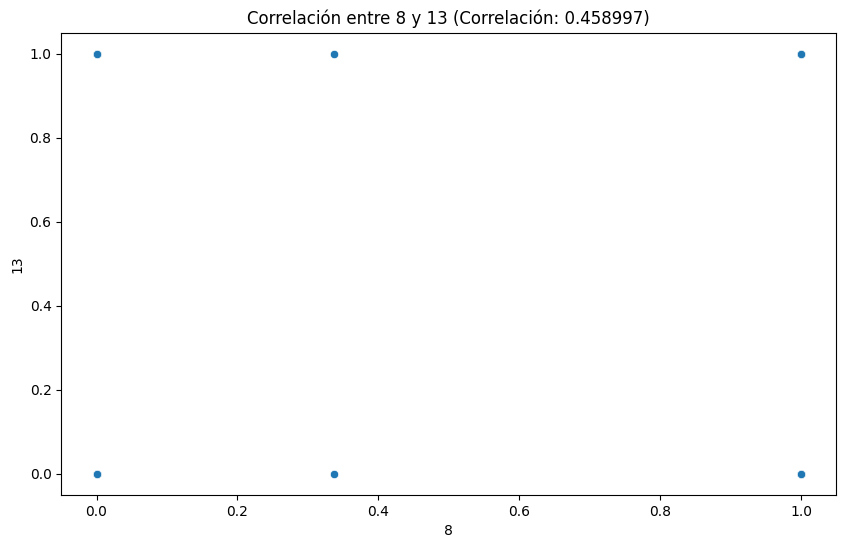

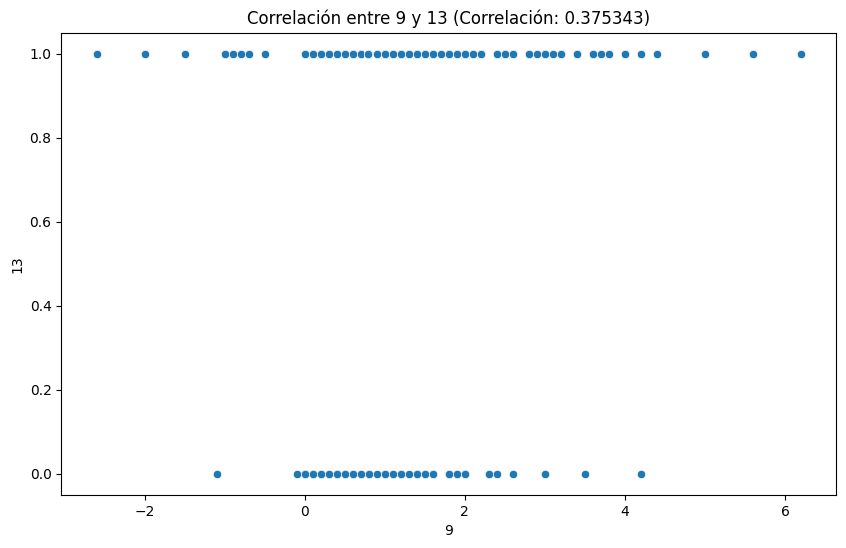

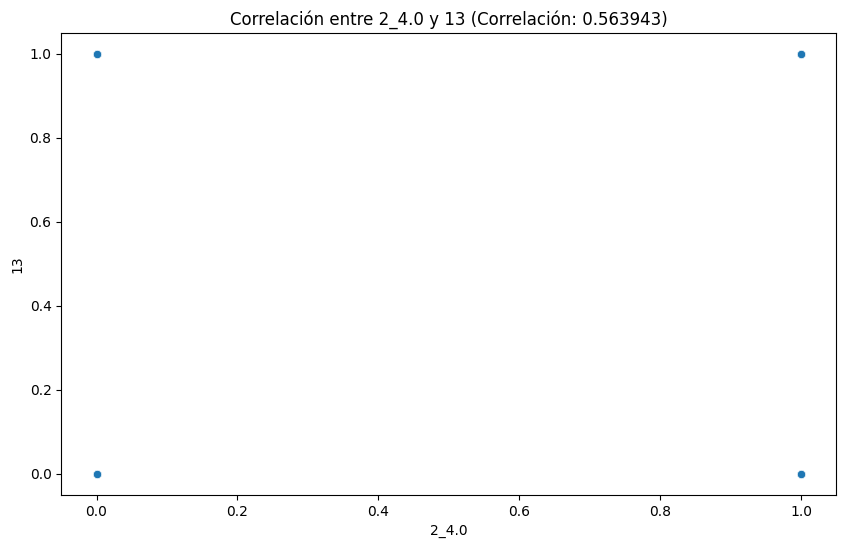

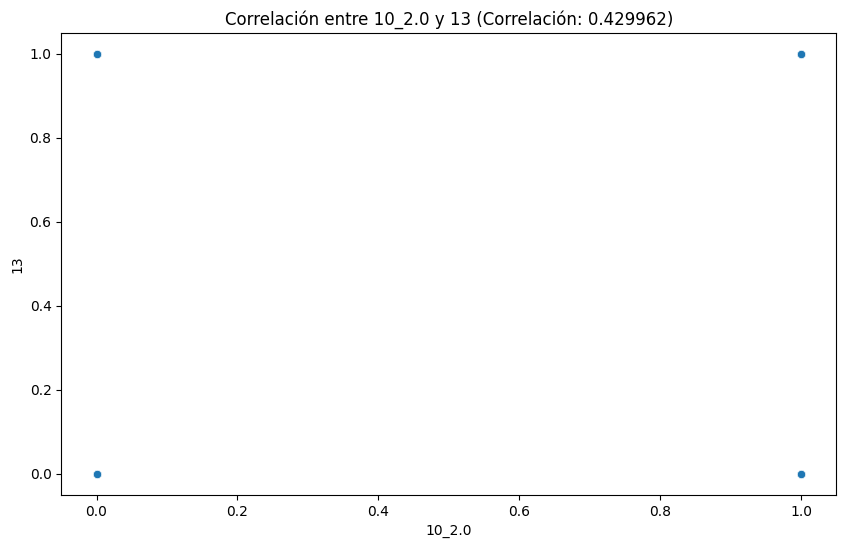

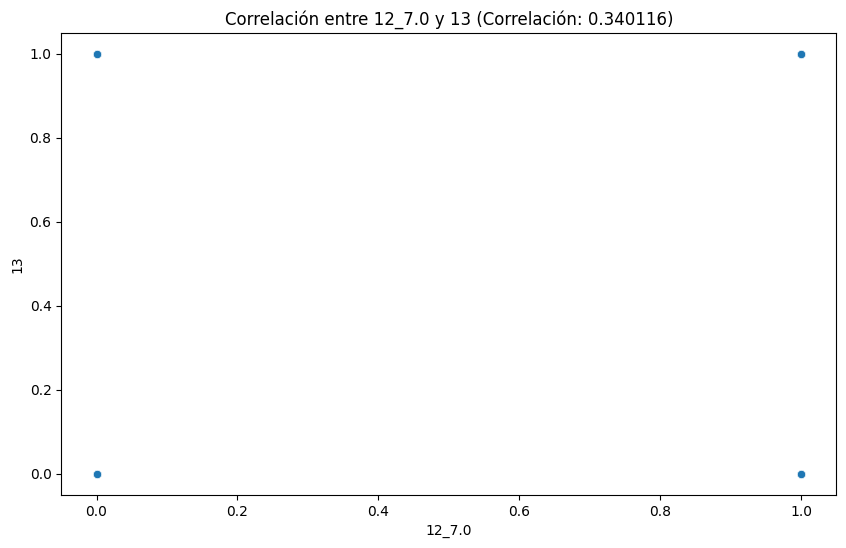

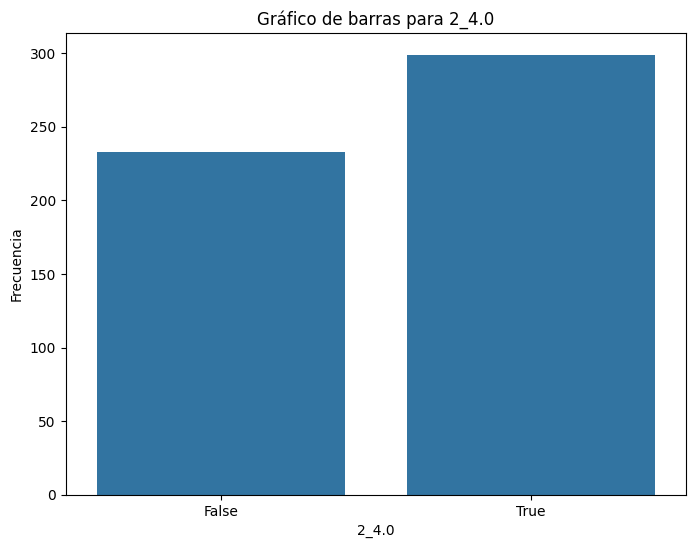

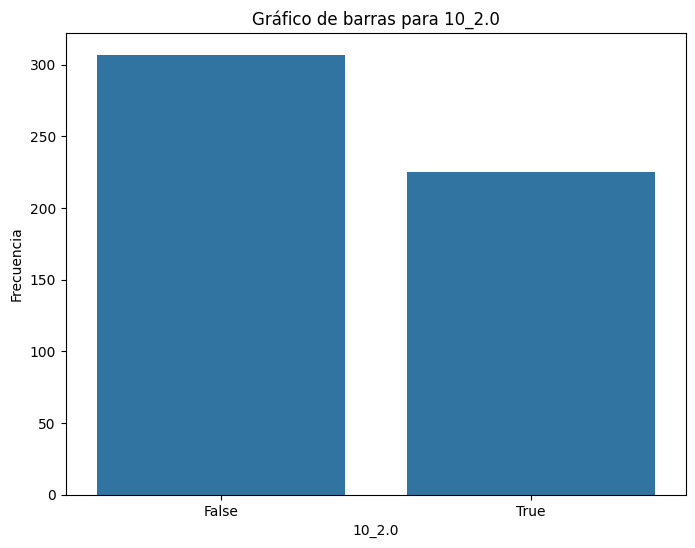

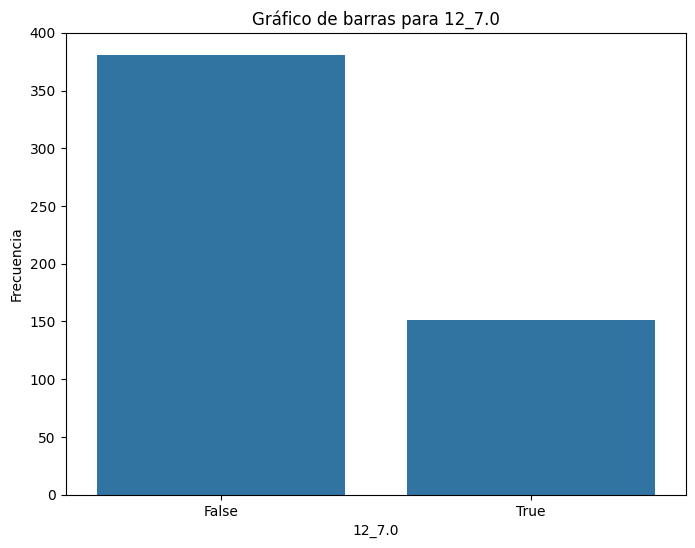

In [71]:
#FernandoSanchez Correlaciones más fuertes
strong_correlations = {
    8 : 0.458997,
    9 : 0.375343,
    '2_4.0' : 0.563943,
    '10_2.0' : 0.429962,
    '12_7.0' : 0.340116
}

#FernandoSanchez Graficar correlación '8'
correlation = strong_correlations.get(8)
if 8 in data.columns and 13 in data.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[8], y=data[13], data=data)
    plt.title(f"Correlación entre 8 y 13 (Correlación: {correlation})")
    plt.xlabel(8)
    plt.ylabel(13)
    plt.show()
else:
    print("Error: Una o ambas variables '8' o '13' no existen en el DataFrame.")

#FernandoSanchez Graficar correlación '9'
correlation = strong_correlations.get(9)
if 9 in data.columns and 13 in data.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[9], y=data[13], data=data)
    plt.title(f"Correlación entre 9 y 13 (Correlación: {correlation})")
    plt.xlabel(9)
    plt.ylabel(13)
    plt.show()
else:
    print("Error: Una o ambas variables '9' o '13' no existen en el DataFrame.")

#FernandoSanchez Graficar correlación '2_4.0'
correlation = strong_correlations.get('2_4.0')
if '2_4.0' in data.columns and 13 in data.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data['2_4.0'], y=data[13], data=data)
    plt.title(f"Correlación entre 2_4.0 y 13 (Correlación: {correlation})")
    plt.xlabel('2_4.0')
    plt.ylabel('13')
    plt.show()
else:
    print("Error: Una o ambas variables '2_4.0' o '13' no existen en el DataFrame.")

#FernandoSanchez Graficar correlación '10_2.0'
correlation = strong_correlations.get('10_2.0')
if '10_2.0' in data.columns and 13 in data.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data['10_2.0'], y=data[13], data=data)
    plt.title(f"Correlación entre 10_2.0 y 13 (Correlación: {correlation})")
    plt.xlabel('10_2.0')
    plt.ylabel('13')
    plt.show()
else:
    print("Error: Una o ambas variables '10_2.0' o '13' no existen en el DataFrame.")

#FernandoSanchez Graficar correlación '12_7.0'
correlation = strong_correlations.get('12_7.0')
if '12_7.0' in data.columns and 13 in data.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data['12_7.0'], y=data[13], data=data)
    plt.title(f"Correlación entre 12_7.0 y 13 (Correlación: {correlation})")
    plt.xlabel('12_7.0')
    plt.ylabel('13')
    plt.show()
else:
    print("Error: Una o ambas variables '12_7.0' o '13' no existen en el DataFrame.")
    
#FernandoSanchez Gráfico de barras para las variables categóricas
categorical_variables = ['2_4.0', '10_2.0', '12_7.0']  #FernandoSanchez Variables categóricas con correlaciones más fuertes
for variable in categorical_variables:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=variable, data=data)
    plt.title(f"Gráfico de barras para {variable}")
    plt.xlabel(variable)
    plt.ylabel("Frecuencia")
    plt.show()

"""Los graficos no me dicen nada para confirmar relaciones, pero los de barras indican que columna tiene mas false o true en las variables más fuertes"""

2. Divide la muestra en entrenamiento y test (33%), y con ello:
a. entrena un modelo de ensamble secuencial AdaBoost
b. entrena un modelo de ensamble secuencial Gradient Boosting
c. entrena un modelo de ensamble secuencial XGBoosting
Para cada uno, utiliza hiper parámetros por defecto y muestra su desempeño usando
las métricas adecuadas. Comenta.                                                                                                                                   

In [80]:
#FernandoSanchez Convertir nombres de columnas a tipo str
data.columns = data.columns.astype(str)

#FernandoSanchez Dividir la muestra en entrenamiento y test (33%)
X = data.drop(columns=['13'])
y = data['13']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#FernandoSanchez Entrenar un modelo de ensamble secuencial AdaBoost
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
ada_preds = ada_model.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_preds)
ada_f1 = f1_score(y_test, ada_preds)

#FernandoSanchez Entrenar un modelo de ensamble secuencial Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_preds)
gb_f1 = f1_score(y_test, gb_preds)

#FernandoSanchez Entrenar un modelo de ensamble secuencial XGBoosting
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_preds)
xgb_f1 = f1_score(y_test, xgb_preds)

#FernandoSanchez Mostrar desempeño
print("Desempeño de AdaBoost:")
print("Accuracy:", ada_accuracy)
print("F1 Score:", ada_f1)

print("\nDesempeño de Gradient Boosting:")
print("Accuracy:", gb_accuracy)
print("F1 Score:", gb_f1)

print("\nDesempeño de XGBoosting:")
print("Accuracy:", xgb_accuracy)
print("F1 Score:", xgb_f1)

"""El modelo Gradient Boosting muestra el mejor desempeño tanto en precisión como en puntaje F1, con una precisión del 85.29% y un puntaje F1 del 84.85% en el conjunto de prueba.

AdaBoost y XGBoosting tienen desempeños similares, con una precisión del 83.19% para ambos, aunque AdaBoost tiene un puntaje F1 ligeramente más alto (82.76% frente a 82.30%)."""

C:\Users\Fernando Sanchez\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Desempeño de AdaBoost:
Accuracy: 0.8319327731092437
F1 Score: 0.8275862068965517

Desempeño de Gradient Boosting:
Accuracy: 0.8529411764705882
F1 Score: 0.8484848484848485

Desempeño de XGBoosting:
Accuracy: 0.8319327731092437
F1 Score: 0.8230088495575221


'El modelo Gradient Boosting muestra el mejor desempeño tanto en precisión como en puntaje F1, con una precisión del 85.29% y un puntaje F1 del 84.85% en el conjunto de prueba.\n\nAdaBoost y XGBoosting tienen desempeños similares, con una precisión del 83.19% para ambos, aunque AdaBoost tiene un puntaje F1 ligeramente más alto (82.76% frente a 82.30%).'

3. Realiza una búsqueda del hiper parámetro para el modelo que resulte tener mejor
desempeño (utiliza f1-score para determinarlo). Los valores a buscar para la grilla
son:
a. n_estimators: 20 a 200 con 15 valores
b. learning_rate: 0.004 a 1.0 con 40 valores
c. sub_sample: 0.1 a 1.0 con 18 valores
Muestra los mejores hiper parámetros encontrados y entrena un modelo con estos,
presentando sus métricas.

In [88]:
#FernandoSanchez Definir la cuadrícula de hiperparámetros
param_grid = {
    'n_estimators': [20, 200, 15],
    'learning_rate': [0.004, 1.0, 40],
    'subsample': [0.1, 1.0, 18]
}

#FernandoSanchez Inicializar el modelo Gradient Boosting
gb_model = GradientBoostingClassifier()

#FernandoSanchez Inicializar el objeto GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, scoring='f1', cv=5)

#FernandoSanchez Entrenar el objeto GridSearchCV
grid_search.fit(X_train, y_train)

#FernandoSanchez Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:", best_params)

#FernandoSanchez Entrenar un nuevo modelo Gradient Boosting con los mejores hiperparámetros
best_gb_model = GradientBoostingClassifier(**best_params)
best_gb_model.fit(X_train, y_train)

#FernandoSanchez Calcular las métricas del nuevo modelo
best_gb_preds = best_gb_model.predict(X_test)
best_gb_accuracy = accuracy_score(y_test, best_gb_preds)
best_gb_f1_score = f1_score(y_test, best_gb_preds)

print("Desempeño del modelo con mejores hiperparámetros:")
print("Accuracy:", best_gb_accuracy)
print("F1 Score:", best_gb_f1_score)
"""Mejores hiperparámetros encontrados: {'learning_rate': 0.1, 'n_estimators': 50, 'subsample': 1.0}
Desempeño del modelo con mejores hiperparámetros:
Accuracy: 0.8445378151260504
F1 Score: 0.8398268398268398"""

KeyboardInterrupt: 


4. Elabora un gráfico con las curvas ROC para cada modelo entrenado, y a partir de ello
recomienda alguno de ellos. Justifica la decisión


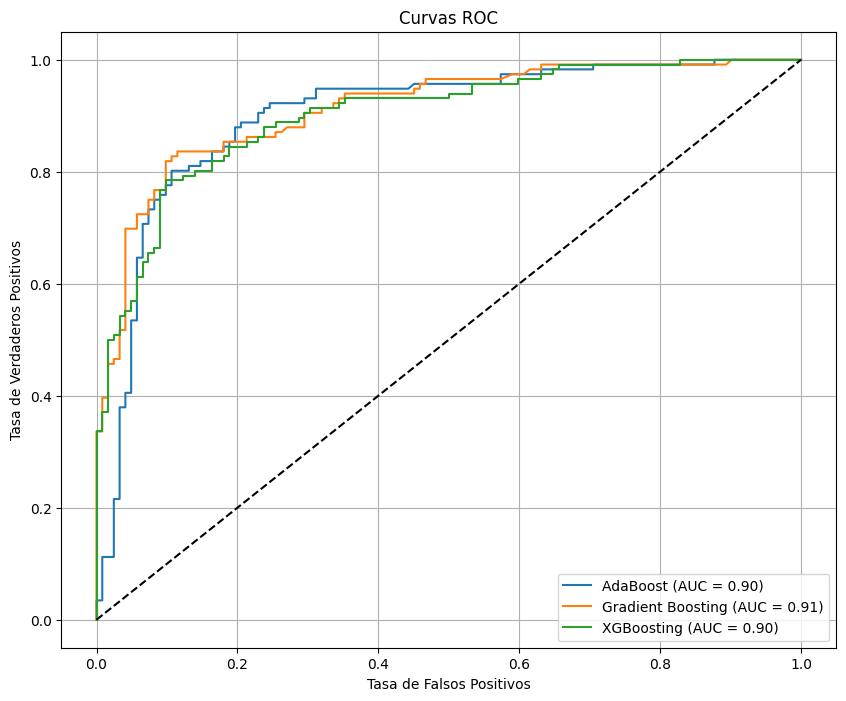

In [86]:
#FernandoSanchez Calcular las probabilidades de predicción para cada modelo
ada_probs = ada_model.predict_proba(X_test)[:, 1]
gb_probs = best_gb_model.predict_proba(X_test)[:, 1]
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

#FernandoSanchez Calcular la curva ROC y el AUC para cada modelo
ada_fpr, ada_tpr, _ = roc_curve(y_test, ada_probs)
ada_auc = roc_auc_score(y_test, ada_probs)

gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
gb_auc = roc_auc_score(y_test, gb_probs)

xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)

#FernandoSanchez Graficar las curvas ROC
plt.figure(figsize=(10, 8))
plt.plot(ada_fpr, ada_tpr, label=f'AdaBoost (AUC = {ada_auc:.2f})')
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting (AUC = {gb_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoosting (AUC = {xgb_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC')
plt.legend()
plt.grid(True)
plt.show()


5. Muestra las variables por nivel de importancia para el mejor modelo, luego de la
búsqueda de hiper parámetro. Comenta.

Desempeño del modelo con mejores hiperparámetros:
Accuracy: 0.8445378151260504
F1 Score: 0.8398268398268398
Precision: 0.8434782608695652
Recall: 0.8362068965517241


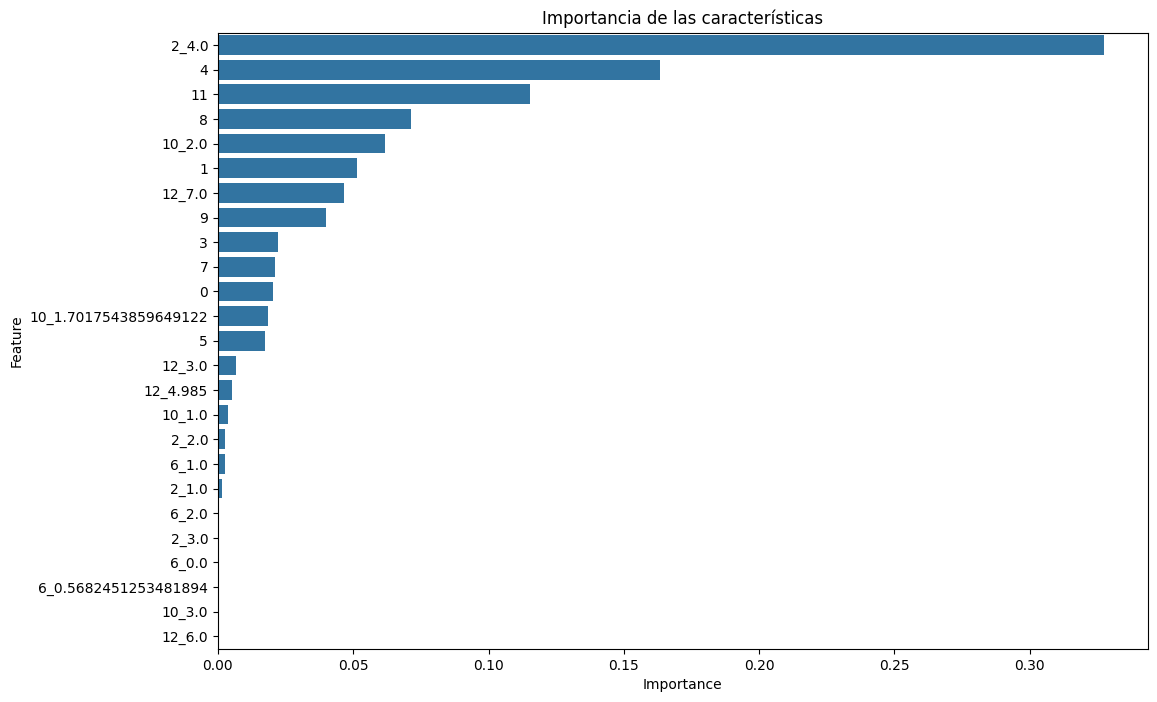

In [87]:
#FernandoSanchez Realizar predicciones y calcular métricas
y_pred = best_gb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Desempeño del modelo con mejores hiperparámetros:")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

#FernandoSanchez Obtener la importancia de las características
feature_importances = best_gb_model.feature_importances_
features = X.columns

#FernandoSanchez Crear un DataFrame para visualizar la importancia de las características
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

#FernandoSanchez Ordenar el DataFrame por importancia descendente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

#FernandoSanchez Visualizar la importancia de las características
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importancia de las características')
plt.show()

"""Desempeño del modelo con mejores hiperparámetros:
Accuracy: 0.8445378151260504
F1 Score: 0.8398268398268398
Precision: 0.8434782608695652
Recall: 0.8362068965517241
La caracteristica más importante es la numero 2 el valor 4"""